# Pairing image

In [1]:
import os
import shutil
from PIL import Image, ImageOps, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import torch
import cv2

## merge train and test set from original dataset

In [2]:
# Define paths
real_test_path = r"D:\Sketchy\Sketchy\real_test"
real_train_path = r"D:\Sketchy\Sketchy\real_train"
real_path = r"D:\Sketchy\Sketchy\real"

# Create the real directory if it doesn't exist
os.makedirs(real_path, exist_ok=True)

# Get subfolder names from both directories
test_subfolders = set(os.listdir(real_test_path))
train_subfolders = set(os.listdir(real_train_path))

# Merge subfolders
all_subfolders = test_subfolders.union(train_subfolders)

for subfolder in all_subfolders:
    # Create subfolder in the real directory
    real_subfolder_path = os.path.join(real_path, subfolder)
    os.makedirs(real_subfolder_path, exist_ok=True)

    # Copy files from real_test to real
    test_subfolder_path = os.path.join(real_test_path, subfolder)
    if os.path.exists(test_subfolder_path):
        for file_name in os.listdir(test_subfolder_path):
            shutil.copy(os.path.join(test_subfolder_path, file_name), real_subfolder_path)

    # Copy files from real_train to real
    train_subfolder_path = os.path.join(real_train_path, subfolder)
    if os.path.exists(train_subfolder_path):
        for file_name in os.listdir(train_subfolder_path):
            shutil.copy(os.path.join(train_subfolder_path, file_name), real_subfolder_path)

print("Merge complete!")


Merge complete!


# GreyScale all real images edges

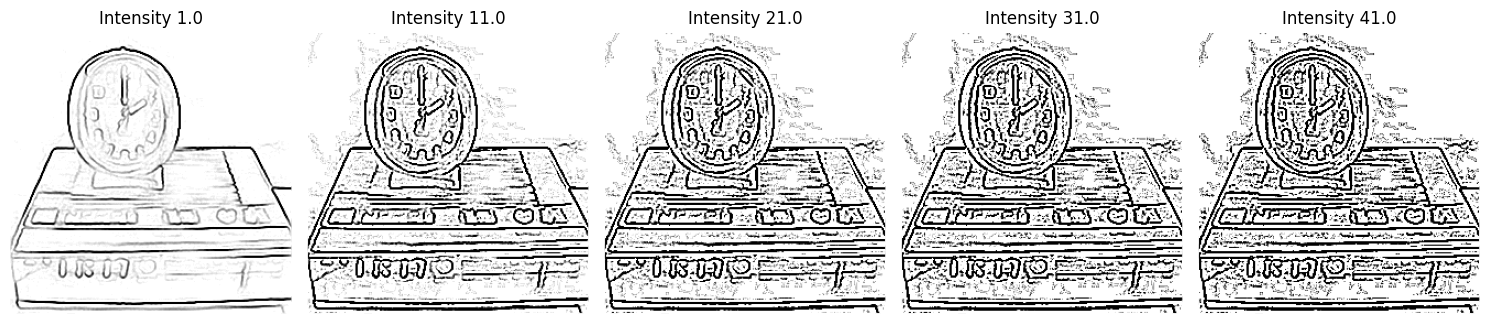

In [43]:
from PIL import Image, ImageFilter, ImageOps
import matplotlib.pyplot as plt
import numpy as np

# Load the sketch
image_path = r"D:\Sketchy\Sketchy\real\alarm_clock\n02694662_17579.png"
img = Image.open(image_path)

# Function to enhance edges and emphasize light colors
def enhance_light_edges(image, intensity=1.0, color_weight=(0.3, 0.59, 0.11)):
    """
    Enhance edges and emphasize light-colored edges.
    
    Args:
        image (PIL.Image): Input RGB image.
        intensity (float): Intensity of edge enhancement.
        color_weight (tuple): Weights for RGB channels in greyscale conversion.
    
    Returns:
        PIL.Image: Processed image with enhanced light edges.
    """
    # Apply edge enhancement filter
    edge_enhanced = image.filter(ImageFilter.EDGE_ENHANCE_MORE)
    
    # Blend the original and enhanced images based on intensity
    enhanced_image = Image.blend(image, edge_enhanced, alpha=intensity)
    
    # Emphasize light-colored edges by converting to greyscale with custom weights
    enhanced_array = np.array(enhanced_image)
    greyscale_array = (
        enhanced_array[:, :, 0] * color_weight[0] +
        enhanced_array[:, :, 1] * color_weight[1] +
        enhanced_array[:, :, 2] * color_weight[2]
    ).astype(np.uint8)
    
    # Invert the greyscale image for better contrast
    inverted_array = 255 - greyscale_array
    enhanced_image = Image.fromarray(inverted_array)
    return enhanced_image

# Visualization parameters
s, e, step = 1, 40, 10  # Start, end, and step for intensity
intensities = np.arange(s, e + step, step)  # Generate intensity range

# Plot results
plt.figure(figsize=(15, 5))

for i, intensity in enumerate(intensities, 1):
    enhanced_img = enhance_light_edges(img, intensity=intensity, color_weight=(0.0005, 0.0005, 0.11))
    plt.subplot(1, len(intensities), i)
    plt.imshow(enhanced_img, cmap='gray')
    plt.title(f"Intensity {intensity:.1f}")
    plt.axis("off")


plt.tight_layout()
plt.show()


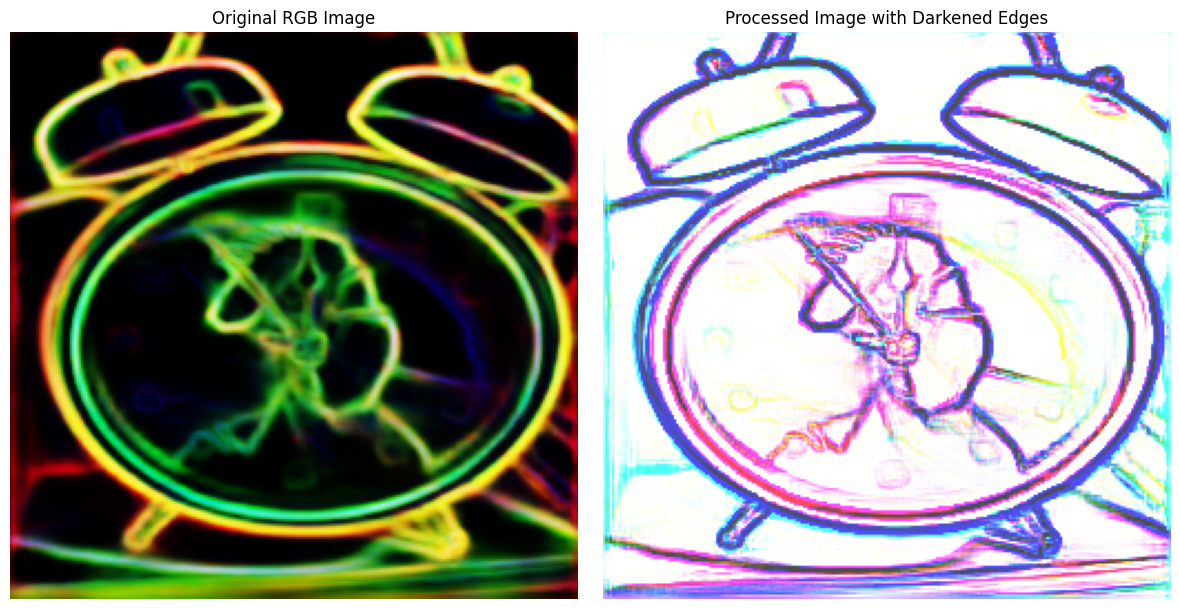

In [27]:
from PIL import Image, ImageFilter, ImageOps
import numpy as np
import matplotlib.pyplot as plt

# Load the RGB image
image_path = r"D:\Sketchy\Sketchy\real\alarm_clock\n02694662_6369.png"
img = Image.open(image_path)

# Function to enhance edges and darken light edges
def enhance_and_darken_edges(image, intensity=1.0, darken_factor=0.8):
    """
    Enhance and darken light-colored edges in an RGB image.
    
    Args:
        image (PIL.Image): Input RGB image.
        intensity (float): Intensity of edge enhancement (default 1.0).
        darken_factor (float): Factor to darken light edges (0.0 to 1.0).
    
    Returns:
        PIL.Image: Processed RGB image with darkened light edges.
    """
    # Apply edge enhancement filter
    edge_enhanced = image.filter(ImageFilter.EDGE_ENHANCE_MORE)
    
    # Sharpen the image
    sharpened = edge_enhanced.filter(ImageFilter.SHARPEN)
    
    # Convert to numpy array for manipulation
    np_img = np.array(sharpened)
    
    # Normalize pixel values to range [0, 1]
    norm_img = np_img / 255.0
    
    # Darken light edges (higher intensity values are reduced)
    darkened_img = norm_img * darken_factor
    
    # Rescale back to [0, 255]
    darkened_img = np.clip(darkened_img * 255, 0, 255).astype(np.uint8)
    
    # Convert back to PIL image
    processed_img = Image.fromarray(darkened_img)
    return processed_img

# Parameters
intensity = 1.0
darken_factor = 0.7  # Adjust this to control how much light edges are darkened

# Process the image
processed_img = enhance_and_darken_edges(img, intensity=intensity, darken_factor=darken_factor)
inverted_img = ImageOps.invert(processed_img)
# Display the original and processed images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Original RGB Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(inverted_img)
plt.title("Processed Image with Darkened Edges")
plt.axis("off")

plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image
import os

# Define the path to the "real" folder
real_path = r"D:\Sketchy\Sketchy\real"  # Update this if the folder is not in the current directory

# Iterate over all subfolders and files
for root, dirs, files in os.walk(real_path):
    for file in files:
        # Full path to the current file
        file_path = os.path.join(root, file)
        
        try:
            # Open the image
            with Image.open(file_path) as img:
                # Convert the image to grayscale
                grayscale_img = img.convert("L")
                # Save the grayscale image, overwriting the original file
                grayscale_img.save(file_path)
            print(f"Converted: {file_path}")
        except Exception as e:
            print(f"Failed to process {file_path}: {e}")

print("All images have been converted to grayscale.")
